In [158]:
import wandb
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime
from wandb.keras import WandbCallback
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [159]:
wandb.init(project="weather history")

epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█████████████▇▆▆▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁
epoch,299
loss,15.91812


In [160]:
data = pd.read_csv("weatherHistory.csv")
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Year'] = data['Formatted Date'].dt.year
data['Day_Year'] = data['Formatted Date'].dt.dayofyear
data = data.groupby(['Day_Year', 'Year'])['Temperature (C)'].mean().reset_index()
data.head()

,Day_Year,Year,Temperature (C)
0,1,2006,4.075000
1,1,2007,3.806713
2,1,2008,-5.663194
3,1,2009,-4.850926
4,1,2010,7.807407


In [161]:
X = data['Day_Year'].values
Y= data['Temperature (C)'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True)

# model

In [163]:
model = tf.keras.models.Sequential([
    Dense(100, input_dim=1, activation='relu'),
    Dense(1000, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(1, activation="linear")
])

In [164]:
model.compile(optimizer=tf.keras.optimizers.Adam(config.learning_rate),
              loss = tf.keras.losses.MeanSquaredError()
              )

In [165]:
model.fit(X_train, Y_train, epochs=600, callbacks=[WandbCallback()])

Epoch 1/600
95/95 [==============================] - 1s 2ms/step - loss: 92.8812 - _timestamp: 1646416197.0000 - _runtime: 15.0000
Epoch 2/600
95/95 [==============================] - 0s 2ms/step - loss: 61.0350 - _timestamp: 1646416198.0000 - _runtime: 16.0000
Epoch 3/600
95/95 [==============================] - 0s 2ms/step - loss: 53.7813 - _timestamp: 1646416198.0000 - _runtime: 16.0000
Epoch 4/600
95/95 [==============================] - 0s 2ms/step - loss: 52.5300 - _timestamp: 1646416198.0000 - _runtime: 16.0000
Epoch 5/600
95/95 [==============================] - 0s 2ms/step - loss: 52.3228 - _timestamp: 1646416198.0000 - _runtime: 16.0000
Epoch 6/600
95/95 [==============================] - 0s 2ms/step - loss: 52.2545 - _timestamp: 1646416198.0000 - _runtime: 16.0000
Epoch 7/600
95/95 [==============================] - 0s 2ms/step - loss: 52.1646 - _timestamp: 1646416198.0000 - _runtime: 16.0000
Epoch 8/600
95/95 [==============================] - 0s 2ms/step - loss: 52.2973 - 

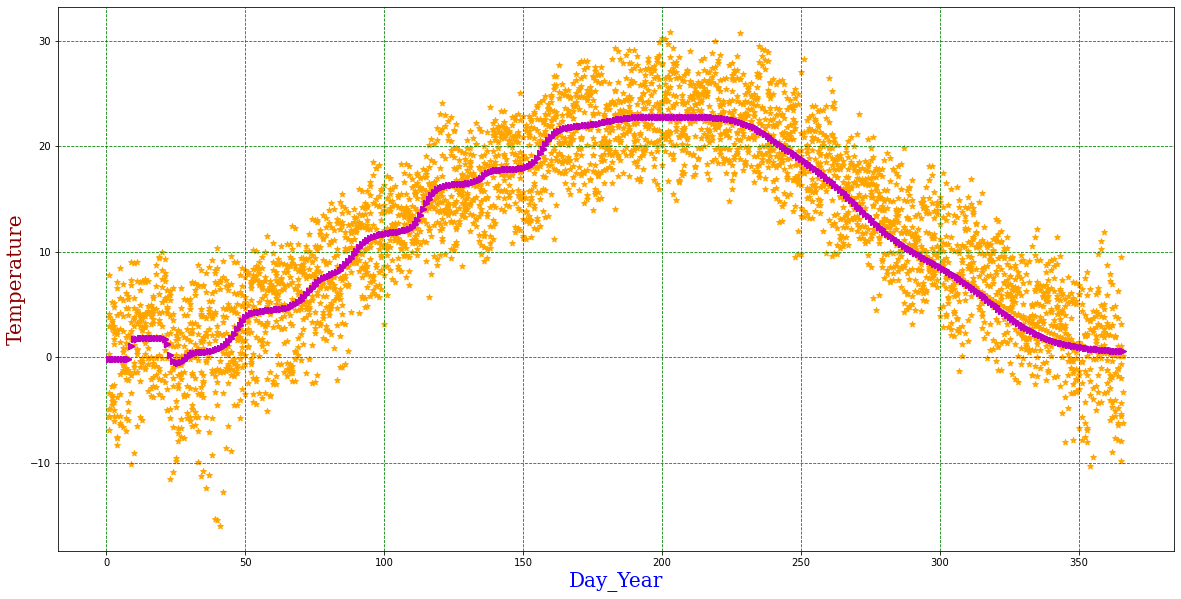

In [166]:
plt.figure(figsize=(20, 10))
Y_pred = model.predict(X_train)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':20}
plt.scatter(X, Y, marker='*', c='orange')
plt.plot(X_train, Y_pred, ">",  color='m', lw=4, label='Fitted line')
plt.xlabel('Day_Year', fontdict = font1)
plt.ylabel('Temperature', fontdict = font2)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.8)

In [167]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 1ms/step - loss: 13.6401


13.640135765075684